/home/luca/.local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<Figure size 432x288 with 0 Axes>

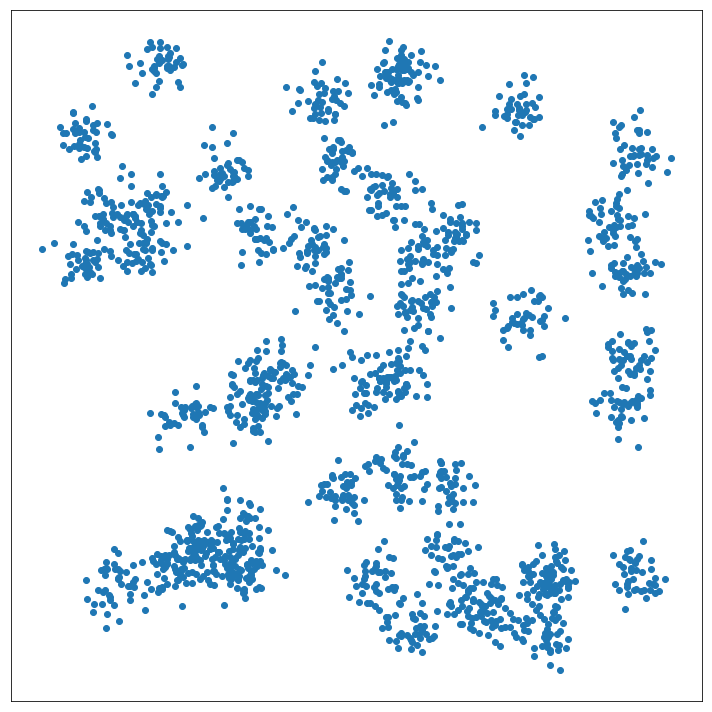

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
data, _ = make_blobs(
    n_samples=2000,
    n_features=2,
    centers=50,
    cluster_std=0.5,
    shuffle=True,
    random_state=0
)

latitudine = data[:,0]
longitudine = data[:,1]

fig = plt.figure()
plt.figure(figsize=(10,10))
plt.tick_params(
    axis='x',          
    which='both',      
    bottom='off',      
    top='off',         
    labelbottom='off') 
plt.tick_params(
    axis='y',          
    which='both',      
    left='off',      
    right='off',         
    labelleft='off') 
plt.scatter(latitudine, longitudine)
plt.tight_layout()
plt.gcf();

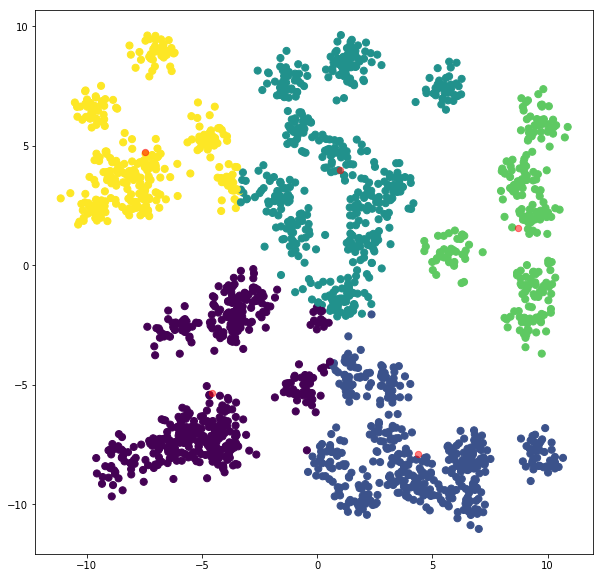

In [2]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=5,
    init='random',
    tol=1e-04
)
y_km = km.fit_predict(data)

plt.figure(figsize=(10,10))

plt.scatter(latitudine, longitudine, c=y_km, s=50, cmap='viridis')
centroidi = km.cluster_centers_
plt.scatter(centroidi[:, 0], centroidi[:, 1], c='red', s=40, alpha=0.5);

In [3]:
print("Inerzia del cluster: {:.2f}".format(km.inertia_))

Inerzia del cluster: 22918.78


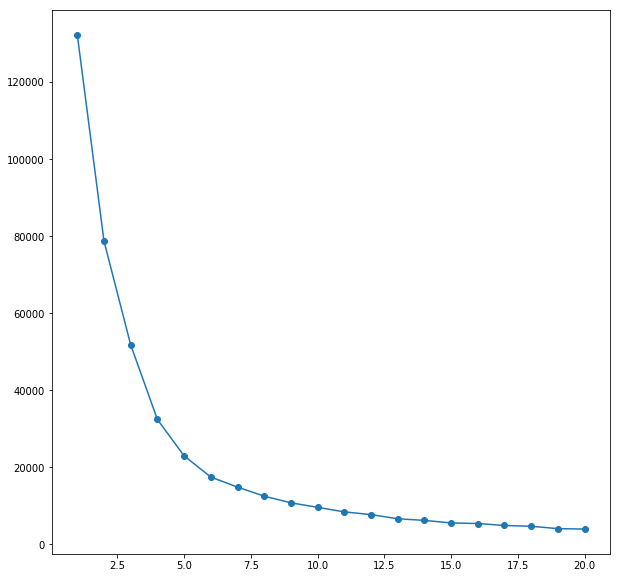

In [4]:
inerzie = []
for clusters in range(1, 21):
    km = KMeans(n_clusters=clusters, init='random', tol=1e-04)
    km.fit_predict(data)
    inerzie.append(km.inertia_)
    
plt.figure(figsize=(10,10))

plt.plot(range(1,21), inerzie, marker='o');

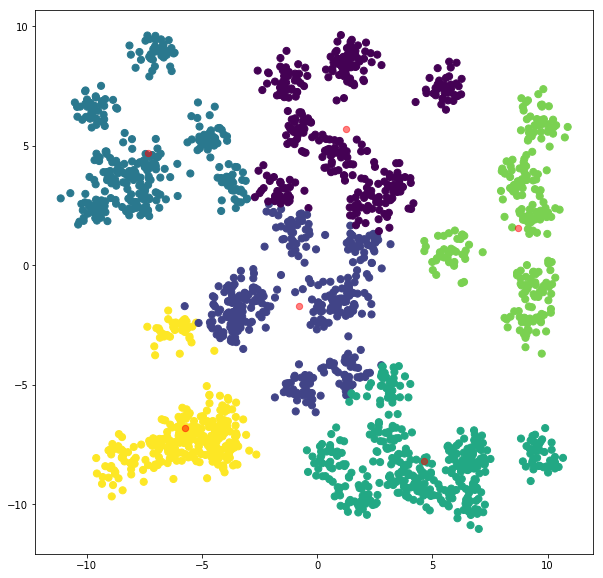

In [6]:
km = KMeans(
    n_clusters=6,
    init='random',
    tol=1e-04
)
y_km = km.fit_predict(data)


plt.figure(figsize=(10,10))

plt.scatter(latitudine, longitudine, c=y_km, s=50, cmap='viridis')
centroidi = km.cluster_centers_
plt.scatter(centroidi[:, 0], centroidi[:, 1], c='red', s=40, alpha=0.5);

<Figure size 432x288 with 0 Axes>

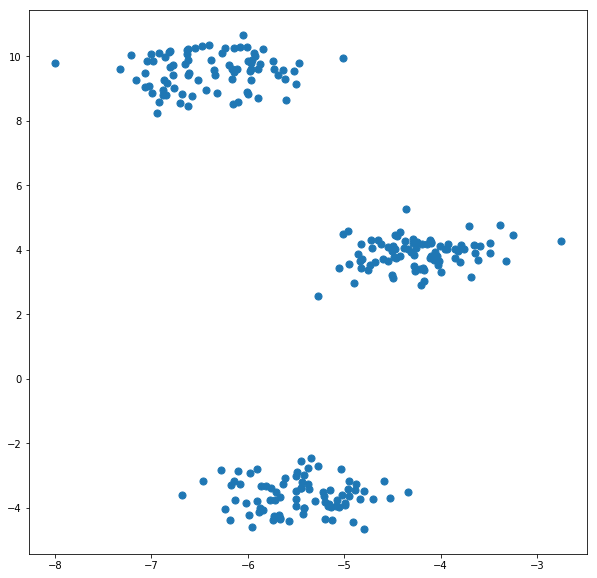

In [7]:
# genero dei dati random
from sklearn.datasets import make_blobs
X, y = make_blobs(
    n_samples=250,
    n_features=2,
    centers=3,
    cluster_std=0.5,
    shuffle=True
)

fig = plt.figure()
plt.figure(figsize=(10,10))

plt.scatter(X[:,0], X[:,1], s=50, cmap='viridis');


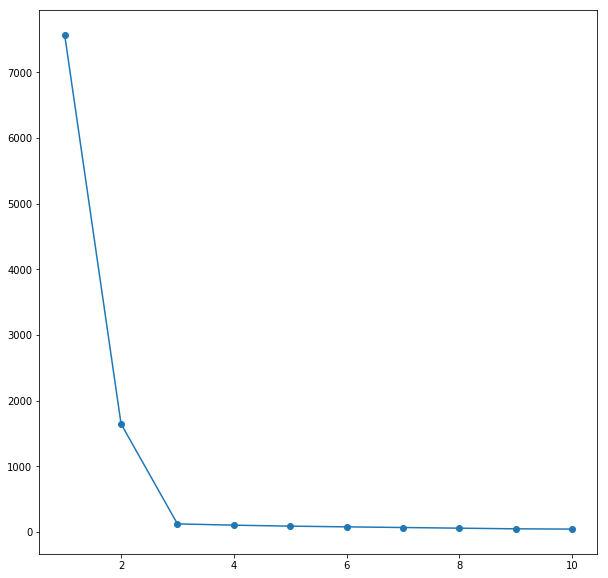

In [8]:
inerzie = []
for clusters in range(1, 11):
    km = KMeans(n_clusters=clusters, init='random', tol=1e-04)
    km.fit_predict(X)
    inerzie.append(km.inertia_)
    
plt.figure(figsize=(10,10))

plt.plot(range(1,11), inerzie, marker='o');

In [9]:
km = KMeans(n_clusters=3, init='random', tol=1e-04)
y = km.fit_predict(X)

from sklearn.metrics import silhouette_samples
silhouettes = silhouette_samples(X, y)
print(silhouettes)

[0.86927541 0.90977329 0.87324268 0.72874372 0.85615692 0.77133968
 0.78442245 0.87360835 0.86618014 0.85035845 0.7491678  0.90811337
 0.82686556 0.75853635 0.90670667 0.90903355 0.88956235 0.86872459
 0.89924303 0.87565681 0.9097498  0.88152377 0.88163159 0.87743902
 0.85384506 0.87459705 0.85113998 0.89392451 0.85932698 0.87001866
 0.84933958 0.91215412 0.86524139 0.86883815 0.85820021 0.90187246
 0.83133801 0.85236682 0.81556564 0.81231584 0.902361   0.90609799
 0.81675193 0.88574357 0.89107679 0.81224986 0.89433743 0.86440009
 0.83256506 0.85824625 0.87899876 0.83740902 0.83326937 0.85498761
 0.82403007 0.8169584  0.86607356 0.8022874  0.9017503  0.9167732
 0.77443194 0.86250841 0.90354758 0.88111713 0.87549518 0.89866545
 0.82886442 0.91298288 0.8126528  0.89159804 0.85065594 0.85445607
 0.89884623 0.74466718 0.88049124 0.83750623 0.88087233 0.84364575
 0.89986729 0.86924398 0.76609846 0.84539282 0.85748101 0.78888405
 0.88771652 0.86188823 0.88009901 0.8899348  0.89457565 0.85028

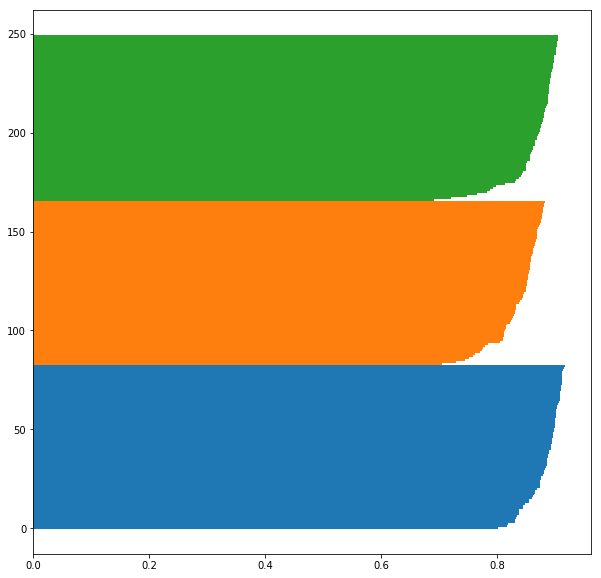

In [10]:
import numpy as np
plt.figure(figsize=(10,10))

clusters = np.unique(y)

y_from, y_to = 0, 0
tacche = []
for i, cluster in enumerate(clusters):
    silhouettes_del_cluster = sorted(silhouettes[y == cluster])
    y_to += len(silhouettes_del_cluster)
    plt.barh(range(y_from, y_to), silhouettes_del_cluster, height=1.0)
    tacche.append((y_from + y_to) / 2)
    y_from += len(silhouettes_del_cluster)

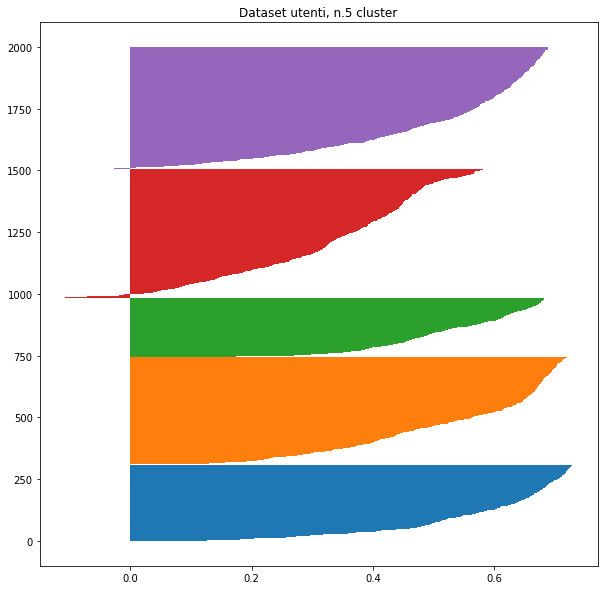

In [11]:
km = KMeans(n_clusters=5, init='random', tol=1e-04)
y = km.fit_predict(data)
silhouettes = silhouette_samples(data, y)

plt.figure(figsize=(10,10))

clusters = np.unique(y)

y_from, y_to = 0, 0
tacche = []
for i, cluster in enumerate(clusters):
    silhouettes_del_cluster = sorted(silhouettes[y == cluster])
    y_to += len(silhouettes_del_cluster)
    plt.barh(range(y_from, y_to), silhouettes_del_cluster, height=1.0)
    tacche.append((y_from + y_to) / 2)
    y_from += len(silhouettes_del_cluster)
    plt.title("Dataset utenti, n.5 cluster")

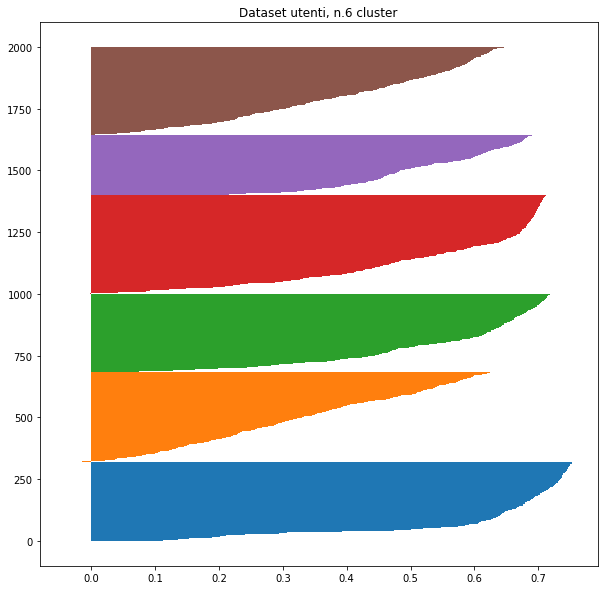

In [12]:
km = KMeans(n_clusters=6, init='random', tol=1e-04)
y = km.fit_predict(data)
silhouettes = silhouette_samples(data, y)
plt.figure(figsize=(10,10))

clusters = np.unique(y)

y_from, y_to = 0, 0
for i, cluster in enumerate(clusters):
    silhouettes_del_cluster = sorted(silhouettes[y == cluster])
    y_to += len(silhouettes_del_cluster)
    plt.barh(range(y_from, y_to), silhouettes_del_cluster, height=1.0)
    y_from += len(silhouettes_del_cluster)
    plt.title("Dataset utenti, n.6 cluster")

In [13]:
print(silhouettes.mean())

0.49283291850541244


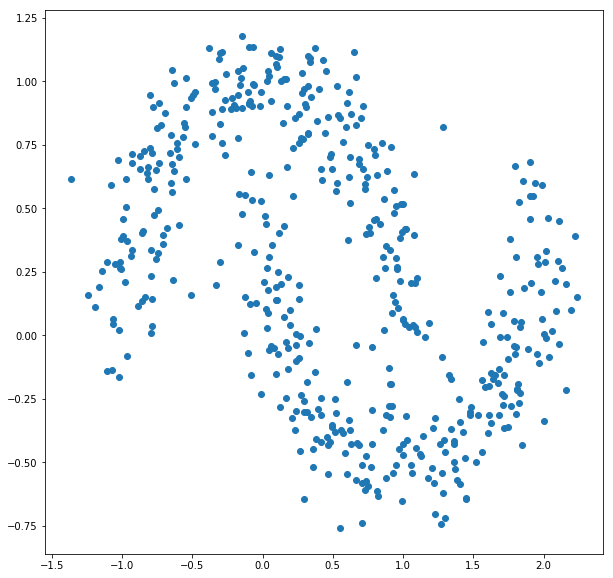

In [14]:
from sklearn.datasets import make_moons

X, y = make_moons(
    n_samples=500,
    noise=0.135
)

plt.figure(figsize=(10,10))

plt.scatter(X[:,0], X[:,1]);

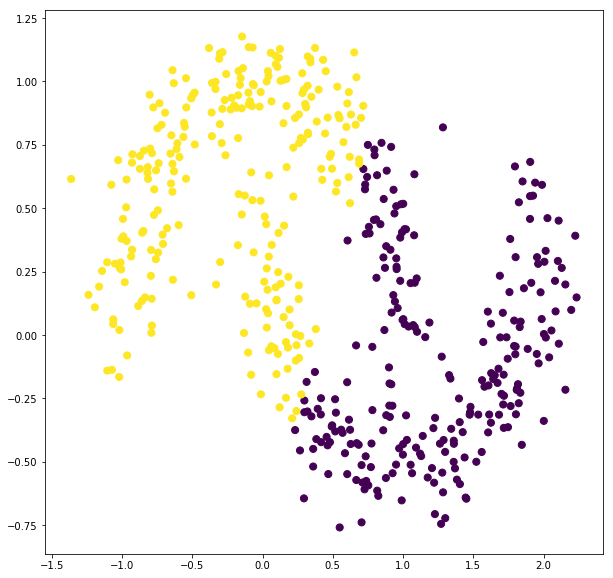

In [15]:
km = KMeans(n_clusters=2, init='random', tol=1e-04)
y = km.fit_predict(X)

plt.figure(figsize=(10,10))

plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='viridis');

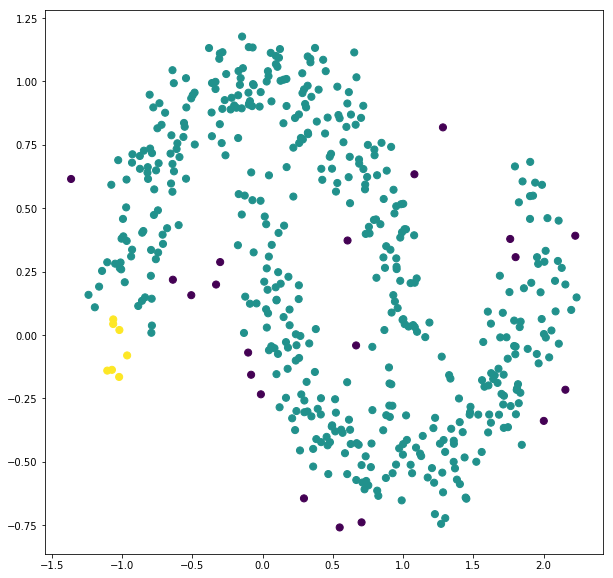

In [16]:
 from sklearn.cluster import DBSCAN

db = DBSCAN(
    eps=0.13,       # misura del raggio
    min_samples=4  # minimo di punti vicini
)

y = db.fit_predict(X)

plt.figure(figsize=(10,10))

plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='viridis');